In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("./books.csv")


- Q1: How many rows and columns are there in books.csv dataset?

In [21]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 399
Number of columns: 24


- Q2: How many books do not have an original title?

In [8]:
# Check if 'original_title' is null in each row
null_titles = df['original_title'].isnull() 

# Count the number of rows with True values (missing titles)
missing_count = null_titles.sum()

# Print the results
print(f"Number of books without an original title: {missing_count}")

Number of books without an original title: 36


- Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [9]:
# Remove rows with null values in 'original_title'
df_filtered = df.dropna(subset=['original_title'])

# Count unique book_id values
unique_books = df_filtered['book_id'].nunique()

# Print the result
print(f"Number of unique books: {unique_books}")

Number of unique books: 363


- Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [10]:
# Calculate the mean of the 'average_rating' column
average_rating = df['average_rating'].mean()

# Print the result
print(f"Average rating of all books: {average_rating:.2f}")  # Round to 2 decimal places

Average rating of all books: 3.98


- Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [11]:
# Filter books published in 2000
df_filtered = df[df['original_publication_year'] == 2000]

# Count the number of books
num_books_2000 = df_filtered.shape[0]

# Print the result
print(f"Number of books published in 2000: {num_books_2000}")

Number of books published in 2000: 8


- Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [12]:
# Find the book with the maximum work_ratings_count
top_rated_book = df[df['work_ratings_count'] == df['work_ratings_count'].max()]['title'].values[0]

# Print the result
print(f"Book with the most ratings: {top_rated_book}")

Book with the most ratings: The Diary of a Young Girl


- Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

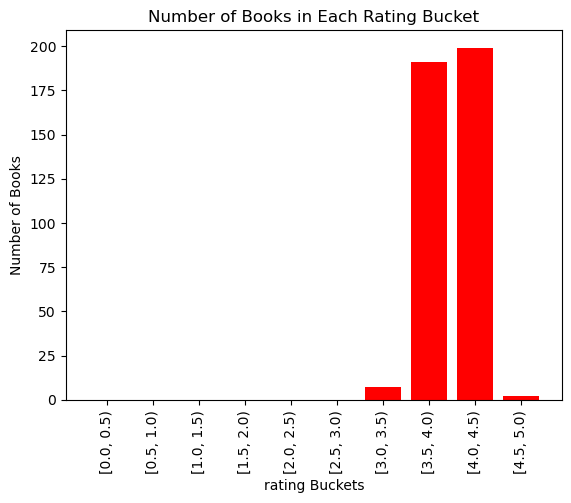

In [19]:
r_bins=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
df['rating_bucket']=pd.cut(df['average_rating'],bins=r_bins,right=False)
rating_counts=df['rating_bucket'].value_counts().sort_index()

plt.bar(rating_counts.index.astype(str),rating_counts.values,color='red')
plt.xlabel("rating Buckets")
plt.ylabel("Number of Books")
plt.xticks(rotation='vertical')
plt.title('Number of Books in Each Rating Bucket')
plt.show()